___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

Use pandas to directly read data from Yahoo finance using pandas!

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) 

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

In [2]:
import matplotlib as plt
import seaborn as sns

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

I'm going to use stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [5]:
start= dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)

In [6]:
BAC = data.get_data_yahoo("BAC", start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
BAC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,31.750576,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,31.413366,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,31.453833,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,31.406628,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,31.426851,15619400
...,...,...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000,14.364412,29369400
2015-12-28,17.219999,17.230000,16.980000,17.129999,14.247971,41777500
2015-12-29,17.250000,17.350000,17.160000,17.280001,14.372735,45670400


In [8]:
C = data.get_data_yahoo("C", start = start, end = end)
GS = data.get_data_yahoo("GS", start = start, end = end)
JPM = data.get_data_yahoo("JPM", start = start, end = end)
MS = data.get_data_yahoo("MS", start = start, end = end)
WFC = data.get_data_yahoo("WFC", start = start, end = end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers =['BAC','C', 'GS', 'JPM', 'MS', 'WFC']

** Concatenate the bank dataframes together to a single data frame called bank_stocks.

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys= tickers, axis = 1)

In [11]:
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.750576  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.413366  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.453833  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.406628  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.426851  15619400   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  32.955093  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  32.977711  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  33.068127  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  33.102043  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  33.452454  4144500  31.674999  31.825001  31.555000   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.124548  11016400  
2006-01-04  31.530001  18.902725  10870000  
2006-01-05  31.495001  18.881744  10158000  
2006-01-06  31.680000  18.992653   8403800  
2006-01-09  31.674999  18.989651   5619600  

[5 rows x 36 columns]

** Set the column name levels:**

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [13]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.750576  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.413366  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.453833  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.406628  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.426851  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.955093  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.977711  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.068127  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.102043  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.452454  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.124548  11016400  
2006-01-04   31.530001  18.902725  10870000  
2006-01-05   31.495001  18.881744  10158000  
2006-01-06   31.680000  18.992653   8403800  
2006-01-09   31.674999  18.989651   5619600  

[5 rows x 36 columns]

# EDA


** Max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.xs(level = 'Stock Info', axis = 1, key = 'Close').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [56]:
bank_stocks.idxmax()

Bank Ticker  Stock Info
BAC          Open         2006-11-21
             High         2006-11-20
             Low          2006-11-17
             Close        2006-11-16
             Adj Close    2007-10-05
             Volume       2009-12-04
C            Open         2006-12-28
             High         2006-12-28
             Low          2006-12-28
             Close        2006-12-27
             Adj Close    2006-12-27
             Volume       2009-12-17
GS           Open         2007-11-01
             High         2007-10-31
             Low          2007-10-31
             Close        2007-10-31
             Adj Close    2007-10-31
             Volume       2008-09-18
JPM          Open         2015-07-23
             High         2015-07-23
             Low          2015-07-23
             Close        2015-07-22
             Adj Close    2015-07-22
             Volume       2012-05-11
MS           Open         2007-06-15
             High         2007-06-15
             L

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()
returns.head()

""


** Filling the new df 'Returns' with return values for each bank through the pct_change() method on the Close column

In [16]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [17]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Pairplot of the returns dataframe.**

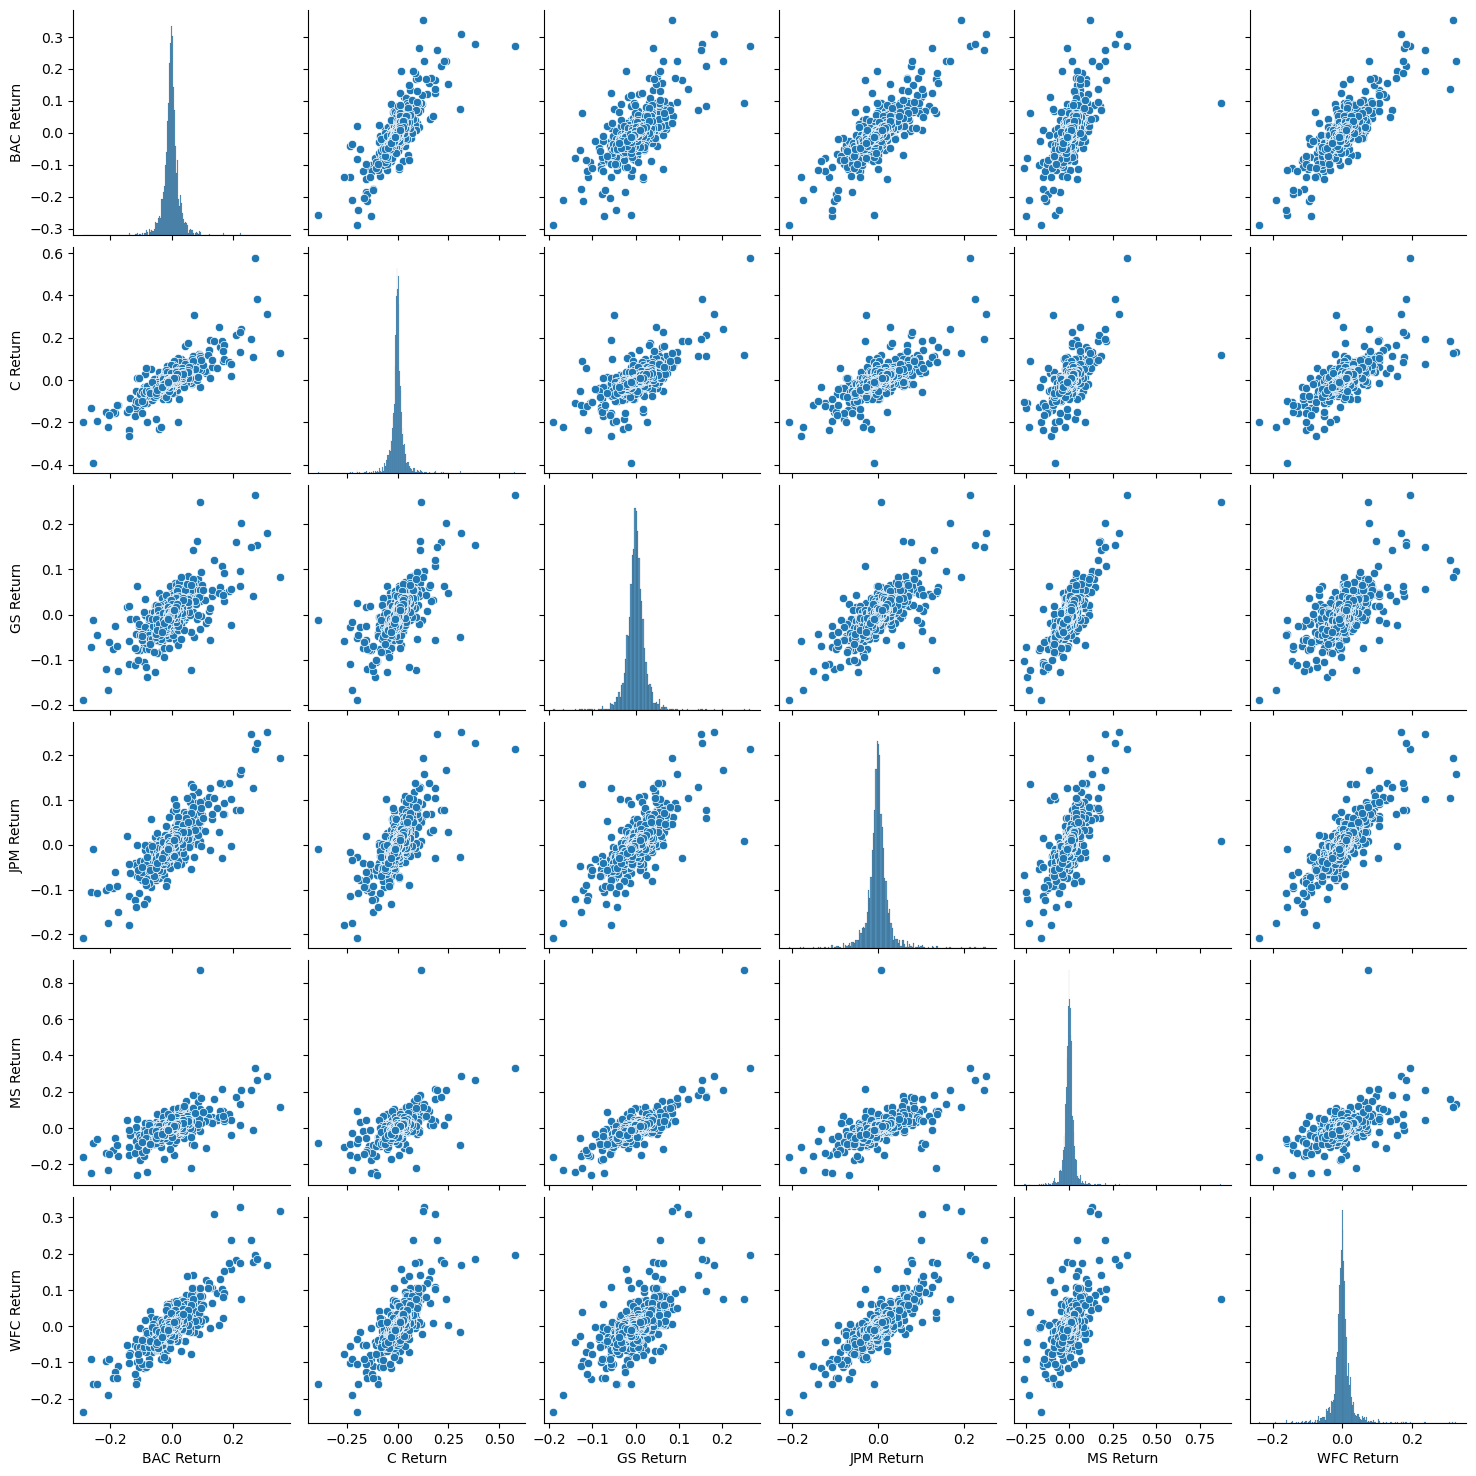

In [18]:
sns.pairplot(returns)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [19]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [20]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [21]:
for col in returns.columns:
    min = returns.xs(key = col, axis = 1).min()
    max= returns.xs(key = col, axis = 1).max()  
    print(f'{col} : {min}, {max}')

BAC Return : -0.2896935896149381, 0.35269125610998264
C Return : -0.39024391189445073, 0.5782493049308048
GS Return : -0.1895961904204888, 0.2646782298288137
JPM Return : -0.20727430348341036, 0.25096732835180413
MS Return : -0.25892854912751284, 0.8698346912026305
WFC Return : -0.23822273502353553, 0.327645014059605


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

**Splitting of the stocks**

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [23]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

** Citigroup seems to have the largest deviation and hence the riskiest **

In [24]:
returns_2015 = returns['2014-12-31':'2015-12-31'].std()
returns_2015

BAC Return    0.016152
C Return      0.015282
GS Return     0.014031
JPM Return    0.014001
MS Return     0.016219
WFC Return    0.012585
dtype: float64

** In 2015, all banks have similar risk, with Wells Fargo bank bank the most safest.**

In [25]:
returns['BAC Return']['2014-12-31':'2015-12-31'].std()

0.016151561890242465

** Distplot using seaborn of the 2015 returns for Morgan Stanley **

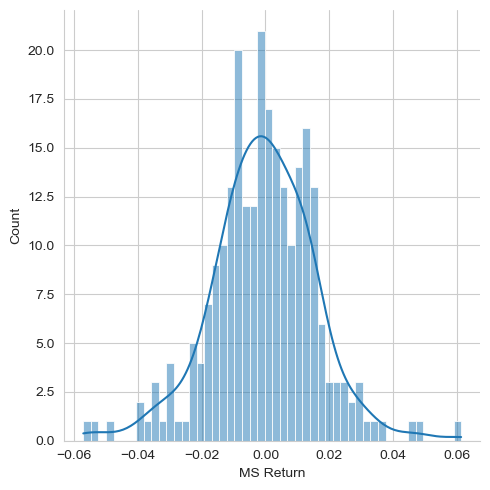

In [44]:
sns.displot(x = returns['MS Return']['2014-12-31':'2015-12-31'], bins = 50, kde =True)

** distplot using seaborn of the 2008 returns for CitiGroup **

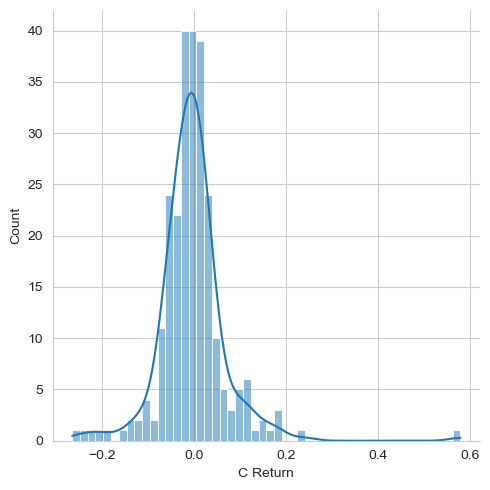

In [42]:
sns.displot(x = returns['C Return']['2007-12-31':'2008-12-31'], bins = 50, kde = True)

**Citigroup had high variability with the highest value(0.6) almost 10 times the highest value of Morgan Stanley(0.06)**

____
# More Visualization


### Imports

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly.express as px
import cufflinks as cf
cf.go_offline()

** Line plot showing Close price for each bank for the entire index of time.

In [37]:
Close_df = bank_stocks.xs(level = 'Stock Info', key = 'Close', axis =1)
Close_df

plt.figure(figsize=(11,5))
px.line(data_frame = Close_df)

<Figure size 1100x500 with 0 Axes>

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

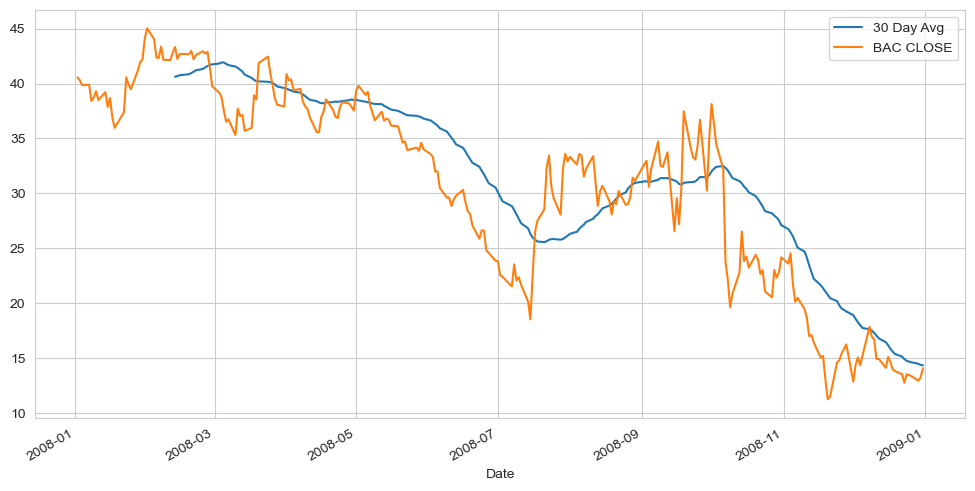

In [31]:
plt.figure(figsize=(12,6))
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

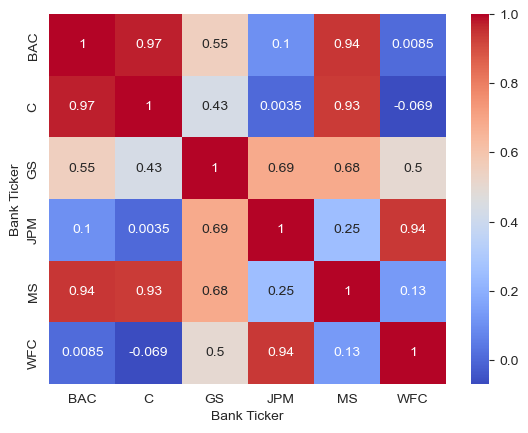

In [38]:
sns.heatmap(Close_df.corr(), annot = True, cmap ='coolwarm')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 400x400 with 0 Axes>

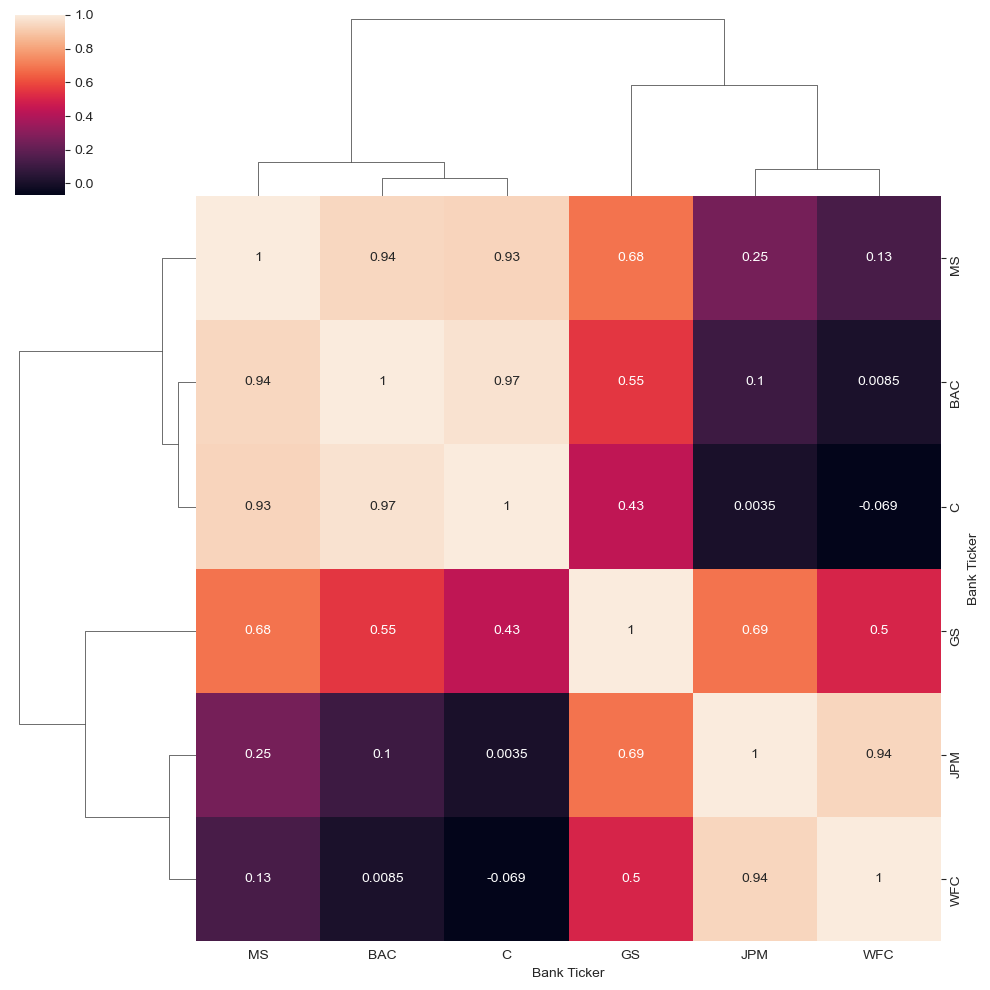

In [55]:
plt.figure(figsize=(4,4))
sns.clustermap(Close_df.corr(), annot =True)

In [53]:
Close_df.corr().iplot(kind = 'heatmap', colorscale = 'rdylbu')

# Part 2


** candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [47]:
BAC['2015.01.01' : '2016.01.01'].iplot(kind = 'candle')

** Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [49]:
MS['Close']['2015.01.01' : '2016.01.01'].ta_plot(study='sma')

/opt/anaconda3/lib/python3.11/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.11/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



**Bollinger Band Plot for Bank of America for the year 2015.**

In [50]:
MS['Close']['2015.01.01' : '2016.01.01'].ta_plot(study='boll')

/opt/anaconda3/lib/python3.11/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

